In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.cluster import DBSCAN

In [2]:
df=pd.read_csv('breast-cancer-wisconsin.csv',header=None)

In [3]:
df.set_index(0,inplace=True)

In [4]:
df[10].unique()

array([2, 4], dtype=int64)

# Question 1

In [5]:
drop_list=list(df[df[6]=='?'].index)

In [6]:
df.drop(drop_list,inplace=True)

In [7]:
df[6]=df[6].astype(int)

In [8]:
model=LocalOutlierFactor(n_neighbors=10,metric='euclidean')
begin_time = time.time()
X=df.drop(10,axis=1)
y=df[10]
y[y==4]=1
y[y==2]=0
model.fit(X,y)
labels = model.fit_predict(X)
end_time = time.time()
time_taken = end_time - begin_time
fpr, tpr, threshold = roc_curve(y, labels)

<ipython-input-8-d06555fa1a1e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y==4]=1
<ipython-input-8-d06555fa1a1e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y==2]=0


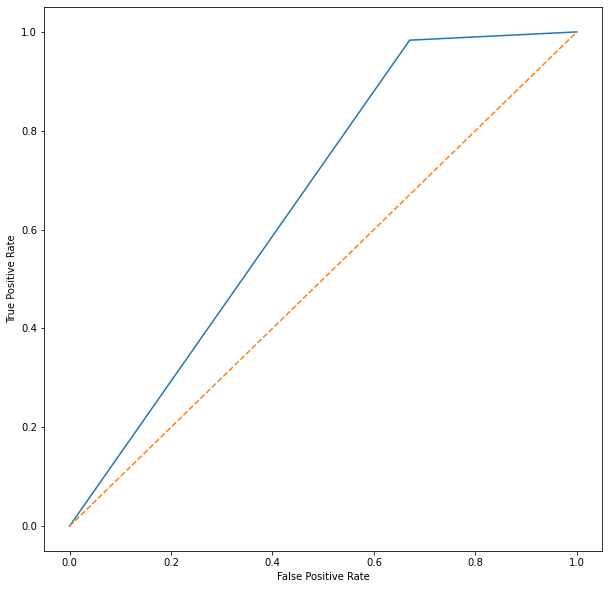

roc_auc_score for Model:  0.656417352210584
time taken for Model: 0.05086350440979004


In [9]:
plt.figure( figsize=(10,10))
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('roc_auc_score for Model: ', roc_auc_score(y, labels))
print("time taken for Model:",time_taken)

# Question 2

In [10]:
clustering = DBSCAN(eps=3, min_samples=10)
res=clustering.fit_predict(df)
begin_time = time.time()
X=df.drop(10,axis=1)
y=df[10]
y[y==4]=1
y[y==2]=0
clustering.fit(X,y)
labels = clustering.fit_predict(X)
end_time = time.time()
time_taken = end_time - begin_time
fpr, tpr, threshold = roc_curve(y, labels)


<ipython-input-10-2737b19a5aa4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y==4]=1
<ipython-input-10-2737b19a5aa4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y==2]=0


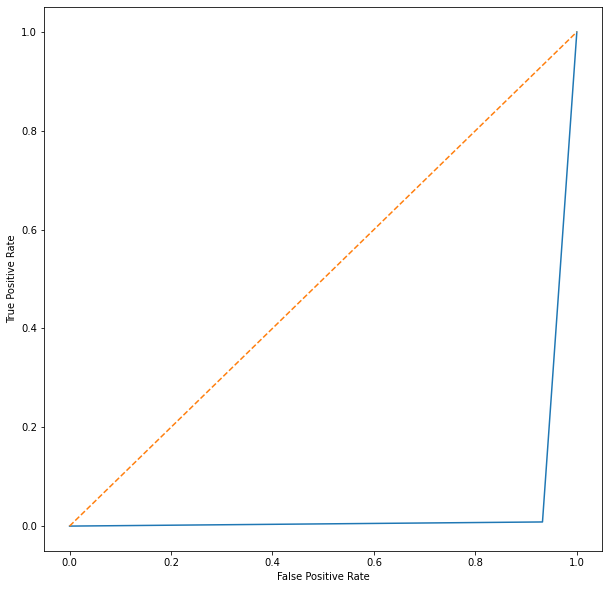

roc_auc_score for Clustering:  0.0380441455651369
time taken for Clustering: 0.058843135833740234


In [11]:
plt.figure( figsize=(10,10))
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('roc_auc_score for Clustering: ', roc_auc_score(y, labels))
print("time taken for Clustering:",time_taken)

# Question 3

### The Local Outlier Factor (LOF) is more accurate than the Density Based Approach as the Accuracy Score for LOF is higher than that of Density Based Approach and the time for processing for LOF is somewhat faster than that of Density Based Approach. Hence LOF is more accurate and faster at processing than that of Density Based Approach.